In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import torch

import torchvision.models as models
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from image_preprocessing import get_masks, resize_masks, masks_to_tensor, image_loader
from neural_style import run_style_transfer

%matplotlib inline

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
imsize = (512, 512) if torch.cuda.is_available() else (128, 128)

In [3]:
idx = 1

path = 'deep-photo-styletransfer-master/examples/'

style_img = image_loader(path + 'style/tar{}.png'.format(idx), imsize).to(device, torch.float)
content_img = image_loader(path + 'input/in{}.png'.format(idx), imsize).to(device, torch.float)
input_img = content_img.clone()

In [4]:
style_masks, content_masks = get_masks(path + 'segmentation/tar{}.png'.format(idx),
                                       path + 'segmentation/in{}.png'.format(idx))
style_masks, content_masks = resize_masks(style_masks, content_masks, imsize)
style_masks, content_masks = masks_to_tensor(style_masks, content_masks)

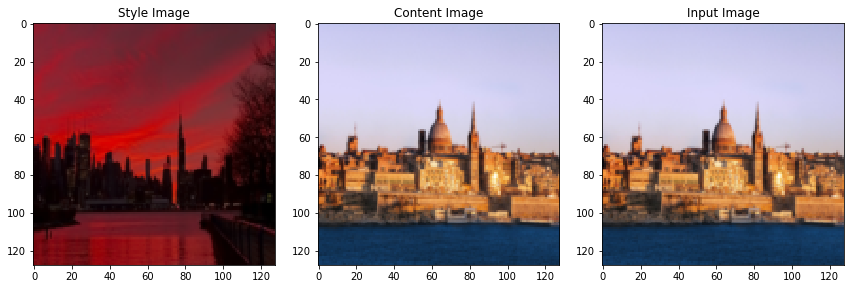

In [5]:
tensor_to_image = lambda x: x.detach().numpy().squeeze().transpose(1, 2, 0).clip(0, 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(tensor_to_image(style_img))
plt.title('Style Image')

plt.subplot(1, 3, 2)
plt.imshow(tensor_to_image(content_img))
plt.title('Content Image')

plt.subplot(1, 3, 3)
plt.imshow(tensor_to_image(input_img))
plt.title('Input Image')

plt.tight_layout();

In [6]:
vgg = models.vgg19(pretrained=True).features.to(device).eval()

# VGG is trained w/ the following normalization: 
vgg_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
vgg_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [38]:
input_img = content_img.clone()

---

### Regularization. N=300

In [55]:
%%time

output = run_style_transfer(vgg, vgg_normalization_mean, vgg_normalization_std,
                            content_img, style_img, input_img,
                            style_masks, content_masks, reg=True,
                            style_weight=10**6, content_weight=10**4, reg_weight=1e-3, num_steps=200)

run   10: S: 29.279 C: 70.042 R:653.450
run   20: S: 31.990 C: 56.985 R:655.897
run   30: S: 34.130 C: 48.790 R:658.978
run   40: S: 35.392 C: 43.077 R:661.010
run   50: S: 36.070 C: 39.044 R:661.593
run   60: S: 36.577 C: 35.835 R:660.543
run   70: S: 36.882 C: 33.294 R:658.478
run   80: S: 37.094 C: 31.240 R:655.305
run   90: S: 36.992 C: 29.721 R:651.713
run  100: S: 36.948 C: 28.414 R:647.549
run  110: S: 36.883 C: 27.216 R:642.743
run  120: S: 36.768 C: 26.204 R:637.544
run  130: S: 36.584 C: 25.403 R:632.895
run  140: S: 36.394 C: 24.742 R:627.761
run  150: S: 36.440 C: 23.957 R:621.444
run  160: S: 36.304 C: 23.396 R:616.708
run  170: S: 36.175 C: 22.866 R:609.642
run  180: S: 36.010 C: 22.454 R:602.271
run  190: S: 35.928 C: 22.025 R:597.166
run  200: S: 35.885 C: 21.641 R:590.775
run  210: S: 35.762 C: 21.362 R:582.436
run  220: S: 35.622 C: 21.049 R:575.614
CPU times: user 6min 26s, sys: 49 s, total: 7min 15s
Wall time: 3min 27s


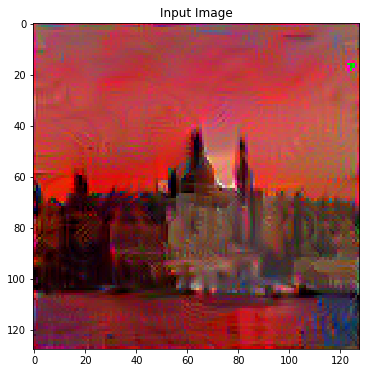

In [56]:
plt.figure(figsize=(6, 6))
plt.imshow(tensor_to_image(output))
plt.title('Input Image');

In [57]:
%%time

output = run_style_transfer(vgg, vgg_normalization_mean, vgg_normalization_std,
                            content_img, style_img, input_img,
                            style_masks, content_masks, reg=True,
                            style_weight=10**6, content_weight=10**4, reg_weight=1e-3, num_steps=1000)

run   10: S: 35.537 C: 20.890 R:575.028
run   20: S: 35.400 C: 20.821 R:573.947
run   30: S: 35.253 C: 20.727 R:571.995
run   40: S: 35.120 C: 20.612 R:568.942
run   50: S: 34.987 C: 20.499 R:565.054
run   60: S: 34.862 C: 20.359 R:560.146
run   70: S: 34.721 C: 20.228 R:554.229
run   80: S: 34.634 C: 20.072 R:547.168
run   90: S: 34.566 C: 19.896 R:539.051
run  100: S: 34.492 C: 19.734 R:534.085
run  110: S: 34.428 C: 19.569 R:525.302
run  120: S: 34.395 C: 19.353 R:519.236
run  130: S: 34.346 C: 19.218 R:510.999
run  140: S: 34.265 C: 19.031 R:505.380
run  150: S: 34.246 C: 18.919 R:498.929
run  160: S: 34.090 C: 18.789 R:494.802
run  170: S: 34.079 C: 18.644 R:489.146
run  180: S: 34.103 C: 18.400 R:483.378
run  190: S: 34.021 C: 18.244 R:480.247
run  200: S: 34.176 C: 18.725 R:472.300
run  210: S: 34.077 C: 17.958 R:473.622
run  220: S: 33.823 C: 17.846 R:469.139
run  230: S: 33.937 C: 17.827 R:465.930
run  240: S: 33.832 C: 17.604 R:461.802
run  250: S: 33.975 C: 17.855 R:456.489


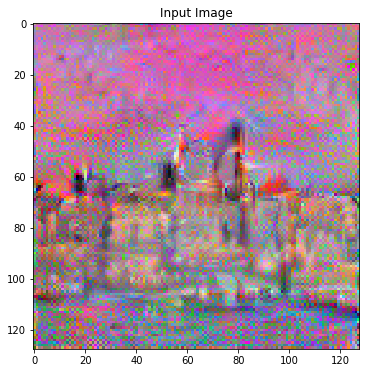

In [58]:
plt.figure(figsize=(6, 6))
plt.imshow(tensor_to_image(output))
plt.title('Input Image');